# AA1 - TRABAJO PRACTICO INTEGRADOR

Integrantes:

* Agustín Arenas


Tematica:

En este trabajo se desarrollara la predicción de la variable objetivo "RainfallTomorrow" (Regresion) y "RainTomorrow" (Clasificación) a traves de diferentes tecnicas de Machine Learning. Se dispone de un dataset con información de diferentes variables de indole climatica, los datos son registros correspondientes a Australia.

## BIBLIOTECAS

In [210]:
# Operaciones
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 500)

# Gráficos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Procesado y Modelado
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")


# EXPLORACION DE DATOS

In [152]:
dft = pd.read_csv("weatherAUS.csv")
dft

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145407,145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No,0.0
145408,145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,0.0
145409,145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,0.0
145410,145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,0.0


## Estructura general del DF

In [153]:
#Descripción general del DF
dft.info()

#Tamaño del dataset (filas, columnas)
dft.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        145412 non-null  int64  
 1   Date              145412 non-null  object 
 2   Location          145412 non-null  object 
 3   MinTemp           143928 non-null  float64
 4   MaxTemp           144159 non-null  float64
 5   Rainfall          142152 non-null  float64
 6   Evaporation       82658 non-null   float64
 7   Sunshine          75616 non-null   float64
 8   WindGustDir       135096 non-null  object 
 9   WindGustSpeed     135159 non-null  float64
 10  WindDir9am        134850 non-null  object 
 11  WindDir3pm        141186 non-null  object 
 12  WindSpeed9am      143645 non-null  float64
 13  WindSpeed3pm      142351 non-null  float64
 14  Humidity9am       142759 non-null  float64
 15  Humidity3pm       140907 non-null  float64
 16  Pressure9am       13

(145412, 25)

El dataset posee 145412 filas y 25 columnas. Se observa que varias columnas no poseen la misma cantidad de filas con datos, sino que algunas tienen datos faltantes.

## Filtración de datos y modificación de columnas

Se estudiara determinadas ciudades del dataset por lo que se descartaran todas las demas.
Las ciudades de Australia a estudiar son:
Adelaide, Canberra, Cobar, Dartmoor, Melbourne, MelbourneAirport, MountGambier, Sydney y SydneyAirport

In [154]:

ciudades = ['Adelaide', 'Canberra', 'Cobar', 'Dartmoor', 'Melbourne', 'MelbourneAirport', 'MountGambier', 'Sydney', 'SydneyAirport']

# Filtrar el DataFrame para obtener solo las filas donde la ubicación está en la lista de ciudades
df = dft[dft['Location'].isin(ciudades)]

Por otro lado la columna Unnamed: 0 se eliminara ya que los indices a usar seran los propios del dataframe

In [155]:
df = df.drop("Unnamed: 0", axis=1)

Las lluvias suelen ser del tipo estacional dependiendo la parte del mundo. Por lo que de la columna Date nos quedaremos con la información del mes, que resulta un buen factor representativo de estacionalidades

In [156]:
# Nos quedamos con la información del mes de la columna Date
df['month'] = df.Date.apply(lambda x: int(str(x).split("-")[1]))

df = df.drop("Date", axis=1)

# Modificamos la columna booleana para que se vea en la forma numerica
df.RainToday = df.RainToday.map({'No': 0, 'Yes': 1})

df.RainTomorrow = df.RainTomorrow.map({'No': 0, 'Yes': 1})


Observamos la estacionalidad de nuestras ciudades en estudio

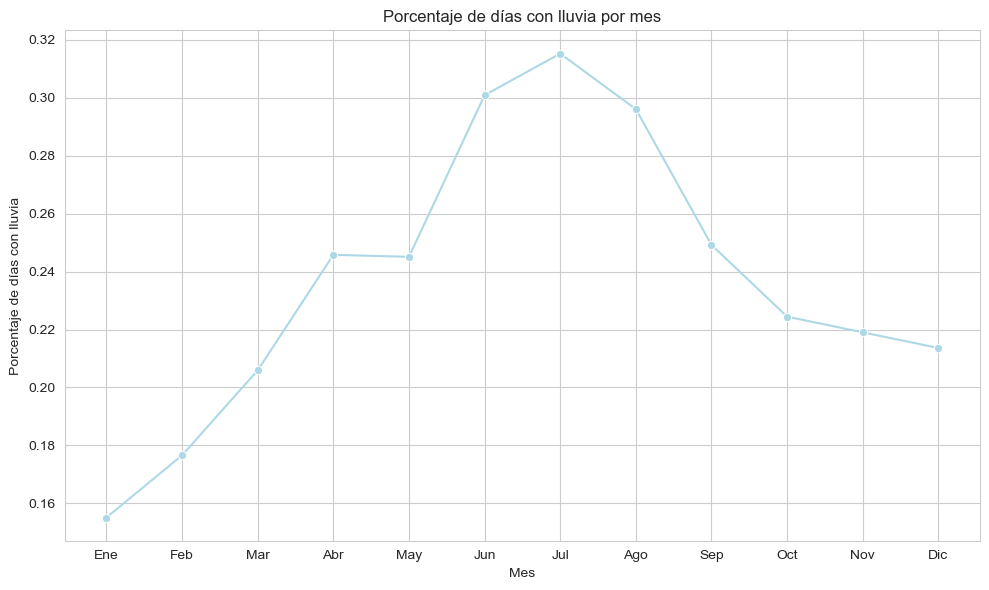

In [157]:

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Datos agrupados por mes para la determinación del porcentaje de los dias con lluvia
sns.lineplot(x=df.groupby('month')['RainToday'].mean().index, y=df.groupby('month')['RainToday'].mean().values, marker='o', color='lightblue')

# Añadir etiquetas y título
plt.title('Porcentaje de días con lluvia por mes')
plt.xlabel('Mes')
plt.ylabel('Porcentaje de días con lluvia')

# Añadir etiquetas de meses al eje x
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Mostrar el gráfico
plt.tight_layout()
plt.show()


La grafica resultante confirma la presencia de un cierto grado de estacionalidad en las precipitaciones de las ciudades de Australia

## Analizamos valores faltantes

In [158]:
#Vemos la cantidad de valores NaN por columna
df.isna().sum()

Location               0
MinTemp              570
MaxTemp              558
Rainfall             986
Evaporation         4353
Sunshine            6713
WindGustDir         1645
WindGustSpeed       1642
WindDir9am          1648
WindDir3pm           437
WindSpeed9am         358
WindSpeed3pm         340
Humidity9am          940
Humidity3pm          890
Pressure9am          839
Pressure3pm          829
Cloud9am            9367
Cloud3pm            9550
Temp9am              585
Temp3pm              576
RainToday            986
RainTomorrow         985
RainfallTomorrow     985
month                  0
dtype: int64

Vemos la cantidad de valores NaN por columna en proporción ordenado de mayor a menor

In [159]:
# Serie de valores de mayor a menor
(df.isna().sum()/df.shape[0]).round(2).sort_values(ascending=False)*100


Cloud3pm            34.0
Cloud9am            33.0
Sunshine            24.0
Evaporation         15.0
WindGustDir          6.0
WindGustSpeed        6.0
WindDir9am           6.0
Humidity9am          3.0
Humidity3pm          3.0
RainToday            3.0
Pressure3pm          3.0
Pressure9am          3.0
RainTomorrow         3.0
RainfallTomorrow     3.0
Rainfall             3.0
MinTemp              2.0
WindDir3pm           2.0
Temp9am              2.0
Temp3pm              2.0
MaxTemp              2.0
WindSpeed9am         1.0
WindSpeed3pm         1.0
Location             0.0
month                0.0
dtype: float64

Observando las peores columnas, la cantidad de datos faltantes es menor al 34%. Por lo que si se realiza una imputación de datos se estaria usando el 66% de los datos, lo que se puede considerar un valor acorde para usar la información disponible para completar datos faltantes, la tecnica elegida en cada columna dependera del comportamiento de esta con la variable objetivo.
Por lo que no se descartara ni se burcara información externa para alguna de las columnas del dataset

## Distribución de los datos en las columnas y valores atípicos

Distribución de los datos respecto a las ciudades a estudiar

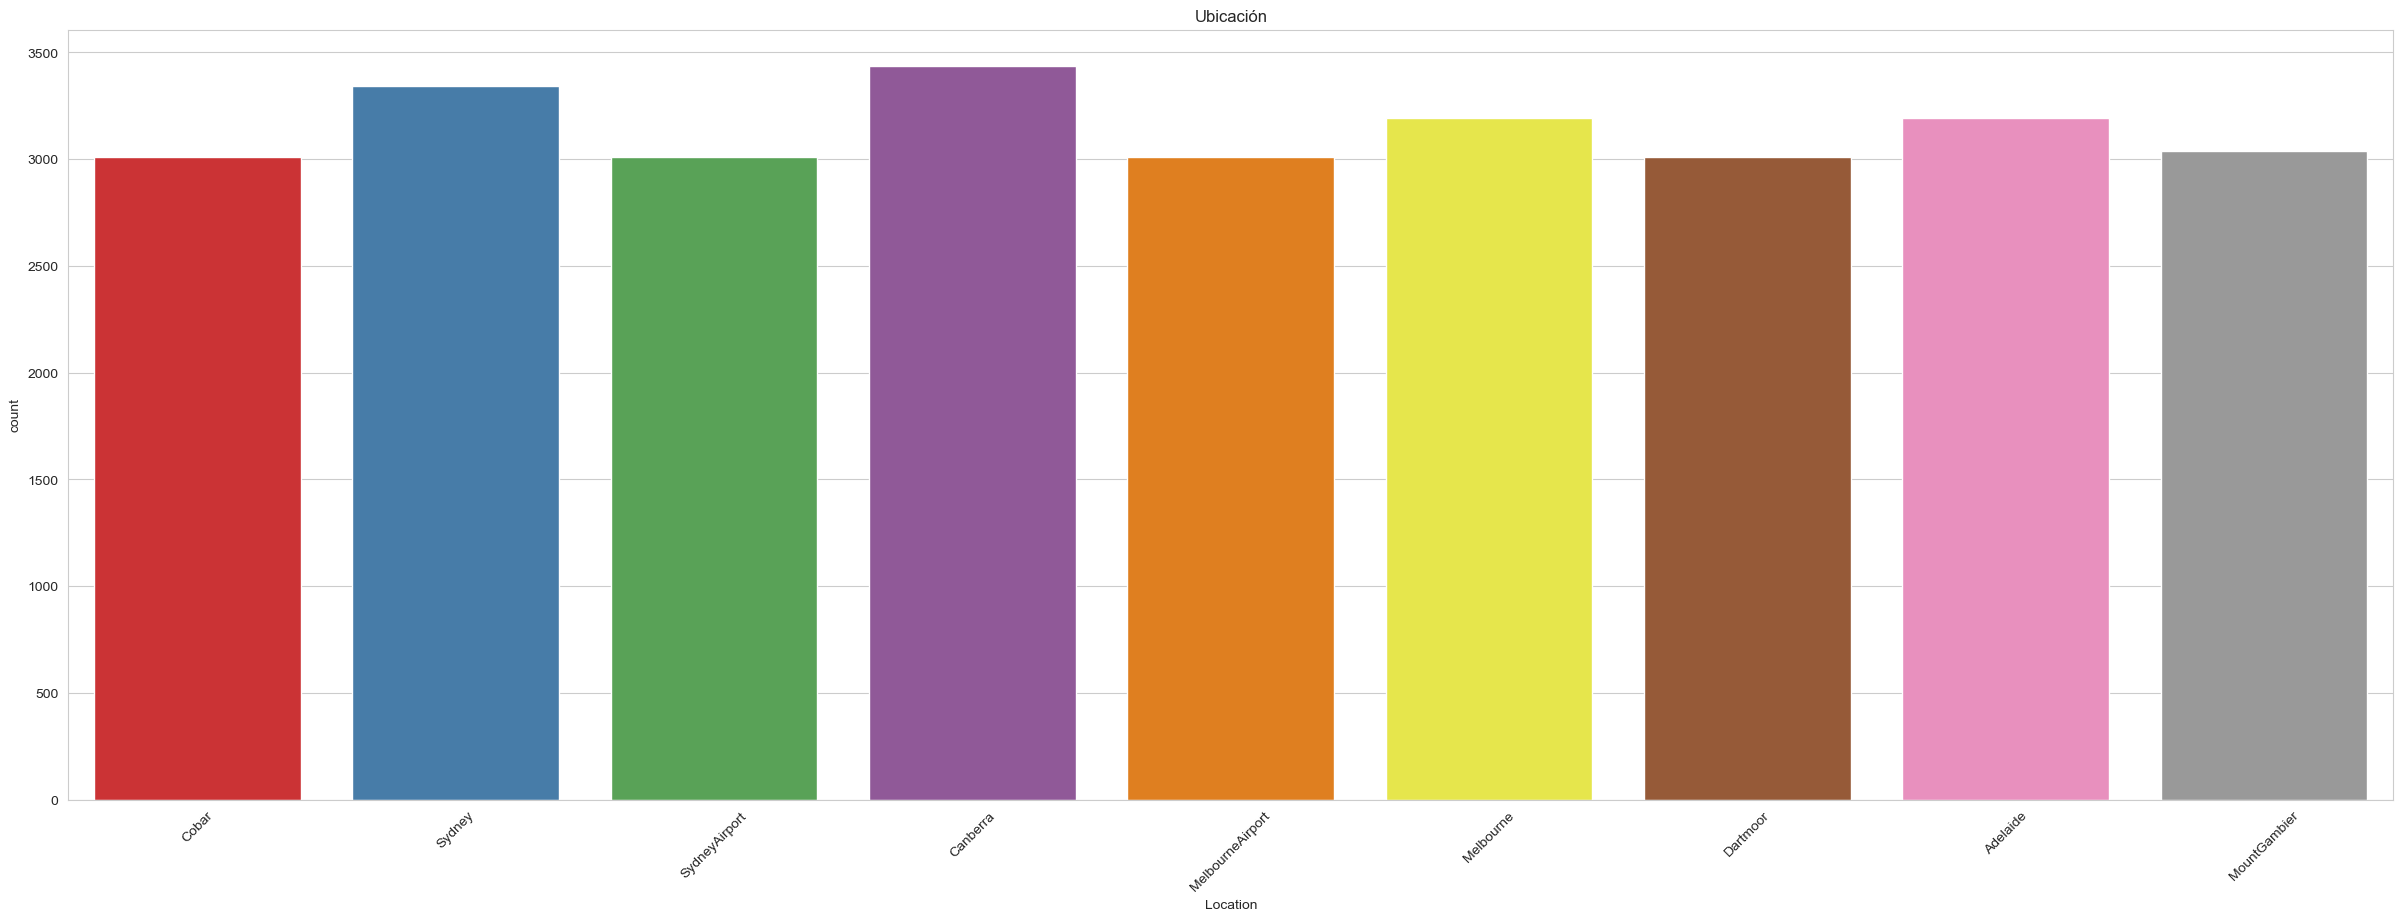

In [160]:
plt.figure(figsize=(30,10))

palette = "Set1"

ax = sns.countplot( x='Location', data=df, palette=palette, hue='Location', legend=False)
plt.title('Ubicación')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

### Observación de los datos de diferentes tiempos y valores atípicos

In [161]:
# Resumen estadistico
df.describe().round(2)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,month
count,27663.00,27675.00,27247.00,23880.00,21520.00,26591.00,27875.00,27893.00,27293.00,27343.00,27394.00,27404.00,18866.00,18683.00,27648.00,27657.00,27247.00,27248.00,27248.00,28233.00
mean,11.26,21.90,2.05,4.83,6.89,41.84,15.13,20.02,68.77,50.50,1018.25,1016.15,4.67,4.73,15.48,20.41,0.24,0.24,2.05,6.42
std,5.71,6.69,6.38,3.71,3.87,14.19,9.46,8.98,18.73,19.94,7.42,7.27,2.81,2.63,5.70,6.53,0.43,0.43,6.38,3.43
min,-8.00,4.10,0.00,0.00,0.00,9.00,0.00,0.00,5.00,1.00,982.30,984.90,0.00,0.00,-1.30,3.70,0.00,0.00,0.00,1.00
25%,7.40,16.60,0.00,2.20,3.80,31.00,9.00,13.00,57.00,37.00,1013.30,1011.30,1.00,2.00,11.40,15.40,0.00,0.00,0.00,3.00
50%,10.90,21.00,0.00,4.00,7.40,39.00,13.00,19.00,70.00,50.00,1018.40,1016.30,6.00,6.00,15.00,19.50,0.00,0.00,0.00,6.00
75%,15.20,26.20,1.00,6.60,10.00,50.00,20.00,26.00,83.00,64.00,1023.30,1021.10,7.00,7.00,19.12,24.50,0.00,0.00,1.00,9.00
max,33.90,46.80,119.40,86.20,14.30,122.00,69.00,76.00,100.00,100.00,1040.60,1037.90,9.00,8.00,38.60,46.10,1.00,1.00,119.40,12.00


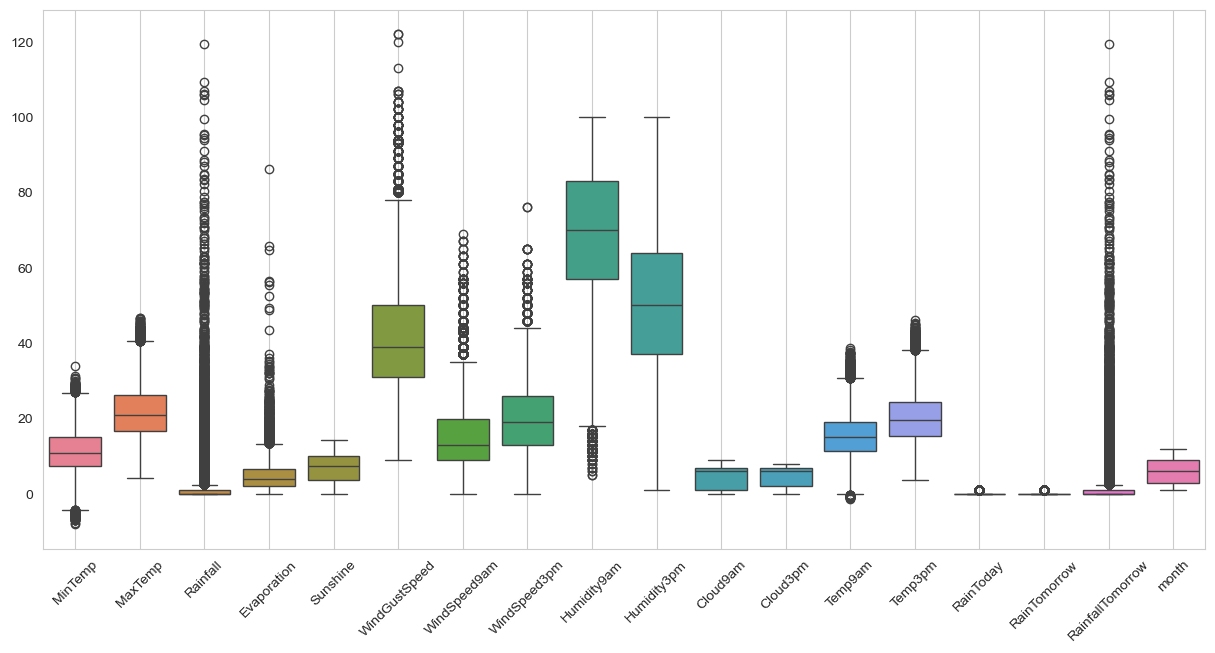

In [162]:
plt.figure(figsize=(15,7))

# Los valores de presión se graficaran a parte ya que numericamente son grandes y deforma los box de las demas columnas 
ax = sns.boxplot(data= df[df.describe().columns].drop(columns=['Pressure9am', 'Pressure3pm']))

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.grid()
plt.show()

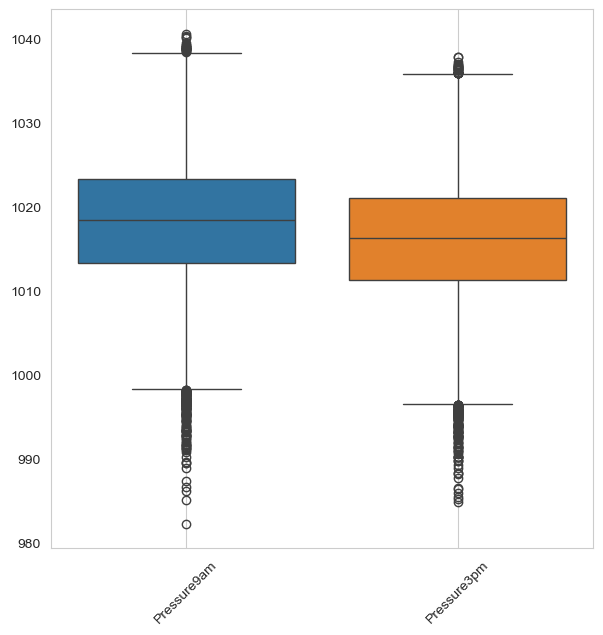

In [163]:
plt.figure(figsize=(7,7))
ax = sns.boxplot(data=df[['Pressure9am', 'Pressure3pm']])

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.grid()
plt.show()

Vemos la matriz de correlación

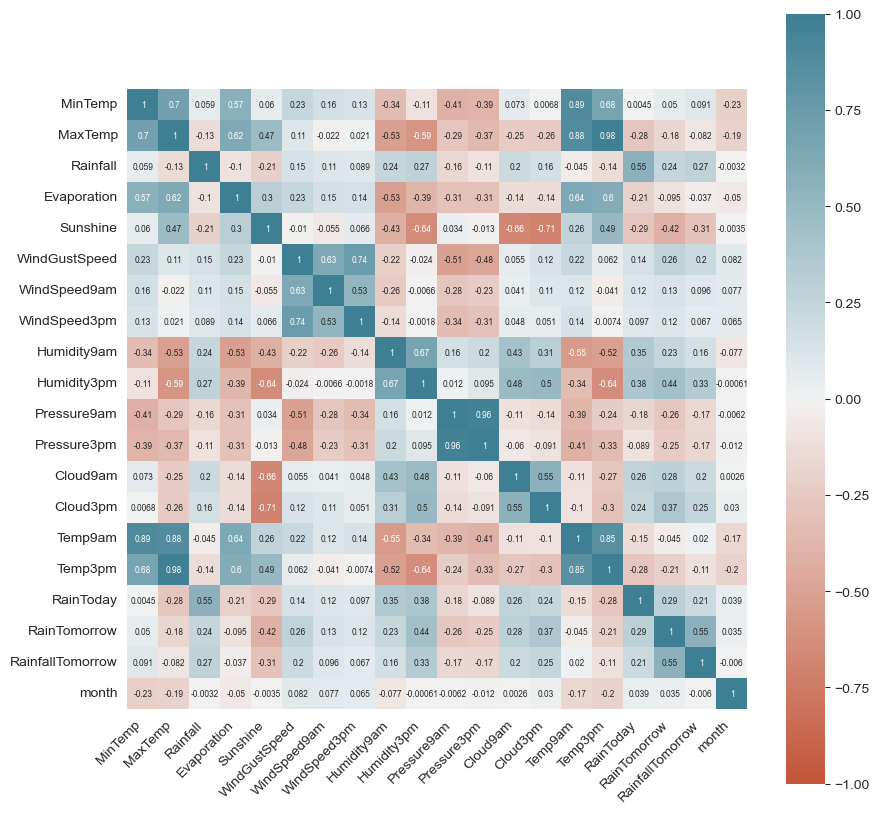

In [164]:
corr = df[df.describe().columns].corr()
plt.figure(figsize=(10,10))

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

Observando los graficos anteriores y prestando atención particular con las columnas que presentan datos del mismo tipo pero con diferente horario, se observo y  se tomo la decisión de unificarlas, explicación:

* En el diagrama de box se observa un comportamiento similar entre los pares.
* En la matriz de correlación se observa valores aproximados entre los pares con respecto a la variable objetivo, excepto el par de temperatura, por ello se prestara atención al coeficiente de correlación resultante de la unificación.
* La proporción de datos faltantes entre los pares es similar, excepto el par de velocidad del viento pero el mayor es del 6% por lo que la imputación  de datos lo cubrira con un 94% de información disponible.

Las operaciones típicas seran:
* col9am - col3pm; Diferencia (o Variación) entre dos eventos distintos
* (col9am + col3pm)/2; Promedio de valores entre dos eventos distintos

La operación adecuada para cada par de columnas, sera aquella que mantenga el nivel más alto de correlacion en comparación a la versión separada de cada par.
En caso de no llegar a un valor considerable de correlación comparativa con la version individual, se cancelara la unificación.

Unificación de las columnas de diferente horario, se itero para determinar que operación era la mas adecuada.

In [165]:
df['windelta'] = (df.WindSpeed9am + df.WindSpeed3pm)/2

df['humdelta'] = (df.Humidity9am + df.Humidity3pm)/2

df['clodelta'] = (df.Cloud9am + df.Cloud3pm)/2

df['presdelta'] = df.Pressure9am - df.Pressure3pm

df['temdelta'] = df.Temp9am - df.Temp3pm

In [166]:
# Dropeamos los pares de columnas de diferente horario

columns_to_drop = ["WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm"]

df.drop(columns=columns_to_drop, inplace=True)


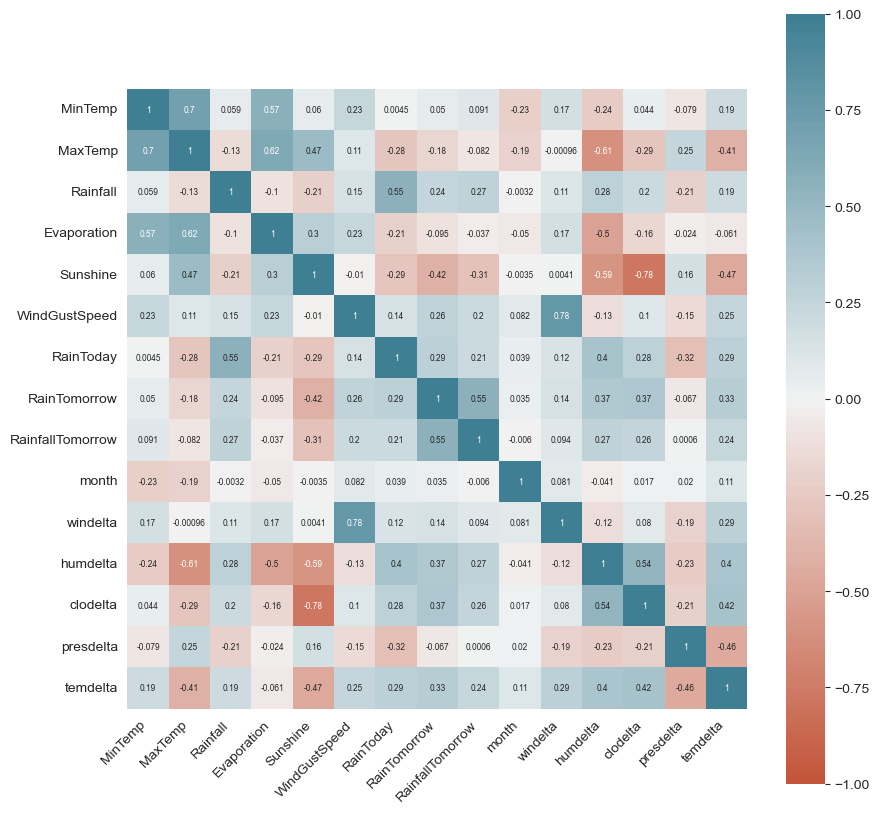

In [167]:
corr = df[df.describe().columns].corr()
plt.figure(figsize=(10,10))

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

Se unificaron todos los pares al verificar que cada uno alcanza como mínimo una correlación similar al de la forma individual en base a la variable objetivo. 

Con las columnas finales volvemos a observar algunas distribuciones

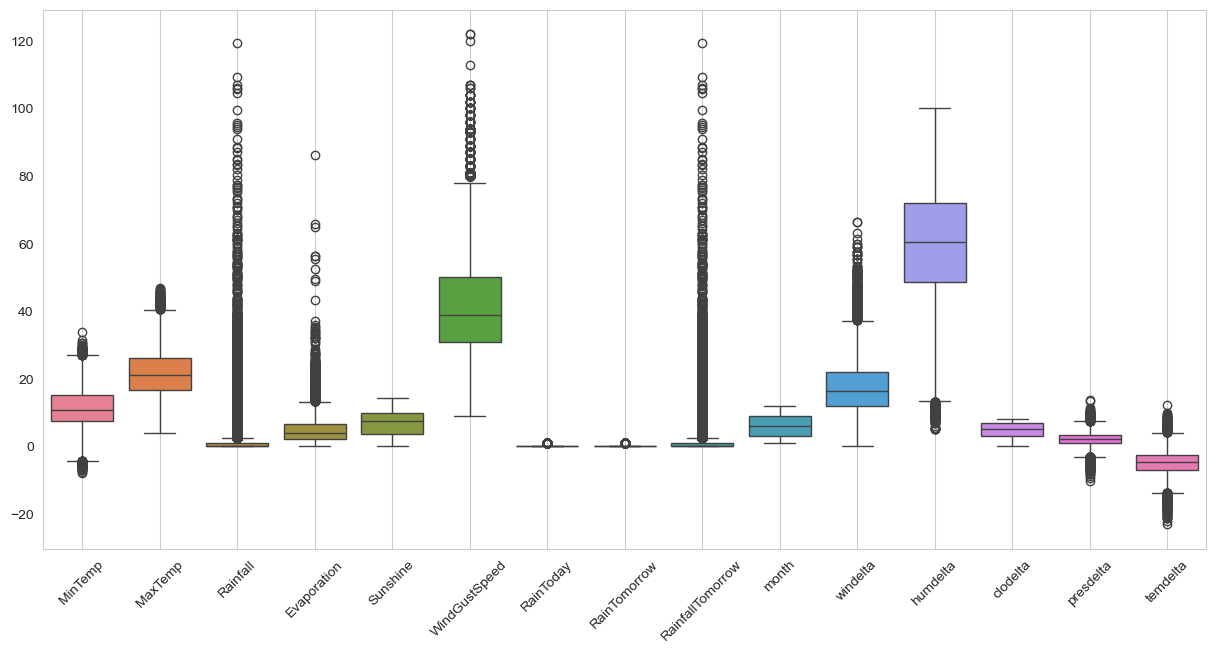

In [168]:
plt.figure(figsize=(15,7))

# Los valores de presión se graficaran a parte ya que numericamente son grandes y deforma los box de las demas columnas

ax = sns.boxplot(data= df[df.describe().columns])

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.grid()
plt.show()

In [169]:
#_ = sns.pairplot(df[df.describe().columns], diag_kind="kde")

ANALISIS DE VALORES ATIPICOS:

Las 4 columnas Rainfall - Evaporation - WindGustSpeed - windelta presentan una distribución particular de outliers:

* WindGustSpeed: Los valores de velocidad de rafaga de viento para el outlier mas alto se encuentra dentro del rango de valores medidos en Australia, por lo que no se eliminaran

* windelta: Similar al caso anterior se encuentran dentro de un rango de valores medidos.

* Evaporation: Valores mayores a 60 son altos, pero según registros el record registrado es de 110mm, por lo que el outlier de 80mm aprox estaria dentro de un valor posible.

* Rainfall - RainfallTomorrow: Similar al caso anterior los valores de lluvia que se observan son valores posibles de registrar, por lo que no se eliminaran

El dataset a pesar de tener valores faltantes, no se encuentran outliers que demuestren ser errores gruesos

## IMPUTACION DE DATOS

In [170]:
# Proporción de datos faltantes

(df.isna().sum()/df.shape[0]).round(2)*100

Location             0.0
MinTemp              2.0
MaxTemp              2.0
Rainfall             3.0
Evaporation         15.0
Sunshine            24.0
WindGustDir          6.0
WindGustSpeed        6.0
WindDir9am           6.0
WindDir3pm           2.0
RainToday            3.0
RainTomorrow         3.0
RainfallTomorrow     3.0
month                0.0
windelta             1.0
humdelta             3.0
clodelta            36.0
presdelta            3.0
temdelta             2.0
dtype: float64

Tecnica adoptada en cada caso:

Rainfall - RainfallTomorrow: Se imputara según datos agrupados primero por mes y segundo por ciudad, segun la mediana de los datos resultantes del grupo, la cual se ajustara con la proporción de dias lluviosos del mes correspondiente.

MinTemp - MaxTemp - Evaporation - Sunshine - WindGustSpeed - RainToday - windelta - humdelta - clodelta - presdelta - temdelta: Se imputara según datos agrupados primero por mes, segundo por ciudad y tercero por rango de lluvia asociado, segun la mediana de los datos resultantes del grupo (la mediana para evitar la influencia de valores de eventos extraordinarios)

In [171]:
# Calcular la proporción de días lluviosos por mes
rain_prop = df.groupby('month')['RainToday'].mean()

# Agrupar por mes y ubicación, y calcular la mediana de Rainfall
median_rainfall = df.groupby(['month', 'Location'])['Rainfall'].median()

# Ajustar la mediana de Rainfall según la proporción de días lluviosos por mes
median_rainfall_adjusted = (median_rainfall * rain_prop[median_rainfall.index.get_level_values('month')].values).round(1)

# Rellenar los valores faltantes en Rainfall con la mediana ajustada correspondiente
df['Rainfall'] = df.apply(lambda row: median_rainfall_adjusted[row['month'], row['Location']].round(1) if pd.isnull(row['Rainfall']) else row['Rainfall'], axis=1)


In [172]:
df.Rainfall.isna().sum()

0

In [173]:
# Calcular la proporción de días lluviosos por mes
rain_prop = df.groupby('month')['RainfallTomorrow'].mean()

# Agrupar por mes y ubicación, y calcular la mediana de RainfallTomorrow
median_rainfall = df.groupby(['month', 'Location'])['RainfallTomorrow'].median()

# Ajustar la mediana de RainfallTomorrow según la proporción de días lluviosos por mes
median_rainfall_adjusted = (median_rainfall * rain_prop[median_rainfall.index.get_level_values('month')].values).round(1)

# Rellenar los valores faltantes en RainfallTomorrow con la mediana ajustada correspondiente
df['RainfallTomorrow'] = df.apply(lambda row: median_rainfall_adjusted[row['month'], row['Location']].round(1) if pd.isnull(row['RainfallTomorrow']) else row['RainfallTomorrow'], 
                                  axis=1)

In [174]:
df.RainfallTomorrow.isna().sum()

0

In [175]:
# Calcular el tamaño de cada rango
range_size = 4

num_ranges = int(df['Rainfall'].max()/range_size) + 1

min_rainfall = df['Rainfall'].min()

# Crear una lista de tuplas con los rangos
rainfall_ranges = [(round(min_rainfall + i * range_size), round(min_rainfall + (i + 1) * range_size)) for i in range(num_ranges)]

# Función para asignar un rango de lluvia a cada valor de Rainfall
def assign_range(rainfall):
    for i, (lower, upper) in enumerate(rainfall_ranges):
        if lower <= rainfall < upper:
            return f'{lower}-{upper}'
    return f'{rainfall_ranges[-1][0]}+'

In [176]:
# Crear una nueva columna 'RainfallRange' que contenga los rangos de lluvia asignados
df['RainfallRange'] = df['Rainfall'].apply(assign_range)

# Agrupar por mes, ubicación y rango de lluvia, y calcular la mediana de MinTemp
median = df.groupby(['month', 'Location', 'RainfallRange'])[df.describe().columns].median()


In [177]:
# Verificar si hay valores NaN en el DataFrame resultante
if median.isna().any().any():
    print("El DataFrame agrupado contiene valores NaN.")
else:
    print("El DataFrame agrupado no contiene valores NaN.")

El DataFrame agrupado contiene valores NaN.


In [178]:
# Calcular la mediana del grupo 'Location' dentro de cada 'month'
median_location_month = df.groupby(['month', 'Location'])[df.describe().columns].median()

# Rellenar los valores NaN en el DataFrame agrupado 'median' con la mediana del grupo 'Location' para cada combinación de 'month' y 'Location'
median = median.fillna(median_location_month)


In [179]:
# Calcular la mediana del grupo 'month'
median_month = df.groupby('month')[df.describe().columns].median()

# Rellenar los valores NaN en el DataFrame agrupado 'median_filled' con la mediana del grupo 'month' para cada 'month' que aún tenga valores NaN
median = median.fillna(median_month)


In [180]:
# Verificar si hay valores NaN en el DataFrame resultante
if median.isna().any().any():
    print("El DataFrame agrupado contiene valores NaN.")
else:
    print("El DataFrame agrupado no contiene valores NaN.")

El DataFrame agrupado no contiene valores NaN.


In [181]:
# Columnas a imputar datos
cols = ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'RainToday', 'RainTomorrow', 'windelta', 'humdelta', 'clodelta', 'presdelta', 'temdelta']

for i in cols:
    df[i] = df.apply(lambda row: median.loc[row['month'], row['Location'], row['RainfallRange']][i] if pd.isna(row[i]) else row[i], axis=1)

In [182]:
# Eliminar la columna auxiliar RainfallRange
df.drop(columns=['RainfallRange'], inplace=True)

In [183]:
(df.isna().sum()/df.shape[0])*100

Location            0.000000
MinTemp             0.000000
MaxTemp             0.000000
Rainfall            0.000000
Evaporation         0.000000
Sunshine            0.000000
WindGustDir         5.826515
WindGustSpeed       0.000000
WindDir9am          5.837141
WindDir3pm          1.547834
RainToday           0.000000
RainTomorrow        0.000000
RainfallTomorrow    0.000000
month               0.000000
windelta            0.000000
humdelta            0.000000
clodelta            0.000000
presdelta           0.000000
temdelta            0.000000
dtype: float64

Completado los datos del tipo numerico queda por resolver los del tipo string

In [184]:
# Agrupar por mes y ubicación, y calcular la moda de las columnas string
mode_str = df.groupby(['month', 'Location'])[['WindGustDir', 'WindDir9am', 'WindDir3pm']].agg(lambda x: x.mode()[0])


In [185]:
# Columnas a imputar datos
cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

for i in cols:
    df[i] = df.apply(lambda row: mode_str.loc[row['month'], row['Location']][i] if pd.isna(row[i]) else row[i], axis=1)

In [186]:
(df.isna().sum()/df.shape[0])*100

Location            0.0
MinTemp             0.0
MaxTemp             0.0
Rainfall            0.0
Evaporation         0.0
Sunshine            0.0
WindGustDir         0.0
WindGustSpeed       0.0
WindDir9am          0.0
WindDir3pm          0.0
RainToday           0.0
RainTomorrow        0.0
RainfallTomorrow    0.0
month               0.0
windelta            0.0
humdelta            0.0
clodelta            0.0
presdelta           0.0
temdelta            0.0
dtype: float64

In [187]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,RainfallTomorrow,month,windelta,humdelta,clodelta,presdelta,temdelta
6047,Cobar,17.9,35.2,0.0,12.0,12.30,SSW,48.0,ENE,SW,0.0,0.0,0.0,1,13.0,16.5,3.5,1.9,-6.80
6048,Cobar,18.4,28.9,0.0,14.8,13.00,S,37.0,SSE,SSE,0.0,0.0,0.0,1,19.0,19.0,1.0,0.8,-6.70
6049,Cobar,15.5,34.1,0.0,12.6,13.30,SE,30.0,ENE,N,0.0,0.0,0.0,1,16.5,27.5,2.5,2.7,-7.35
6050,Cobar,19.4,37.6,0.0,10.8,10.60,NNE,46.0,NNE,NNW,0.0,0.0,0.0,1,22.5,32.0,3.5,3.1,-6.20
6051,Cobar,21.9,38.4,0.0,11.4,12.20,WNW,31.0,WNW,WSW,0.0,0.0,0.0,1,6.0,29.5,3.0,3.6,-6.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102515,MountGambier,6.2,16.3,0.0,1.0,4.05,N,41.0,N,NW,0.0,1.0,2.0,6,23.0,79.5,6.5,2.2,-6.80
102516,MountGambier,8.7,13.2,2.0,1.0,4.05,S,20.0,N,SE,1.0,0.0,0.0,6,5.5,90.0,6.5,0.9,-0.90
102517,MountGambier,7.0,15.7,0.0,1.0,4.05,N,31.0,N,NNW,0.0,0.0,0.0,6,14.0,79.5,6.5,4.6,-4.90
102518,MountGambier,5.4,16.2,0.0,1.0,4.05,N,37.0,NNW,W,0.0,1.0,2.2,6,24.0,80.0,6.0,2.6,-8.50


### Estandarización

Se realiza para evitar problemas con variables con distinta naturaleza y variabilidad, ya que las variables con mayores valores de varianza le quitarán peso al resto de las variables, por lo tanto en este caso vamos a realizar la estandarización.

In [188]:
# Filtramos para quedarnos con las columnas numericas

dfe = df.copy()
dfn = dfe[dfe.drop(['month', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'], axis=1).describe().columns].copy()

#Normalización de acuerdo a la media y el desvio estandar

dfe[dfn.columns] = (dfn - dfn.mean())/dfn.std()

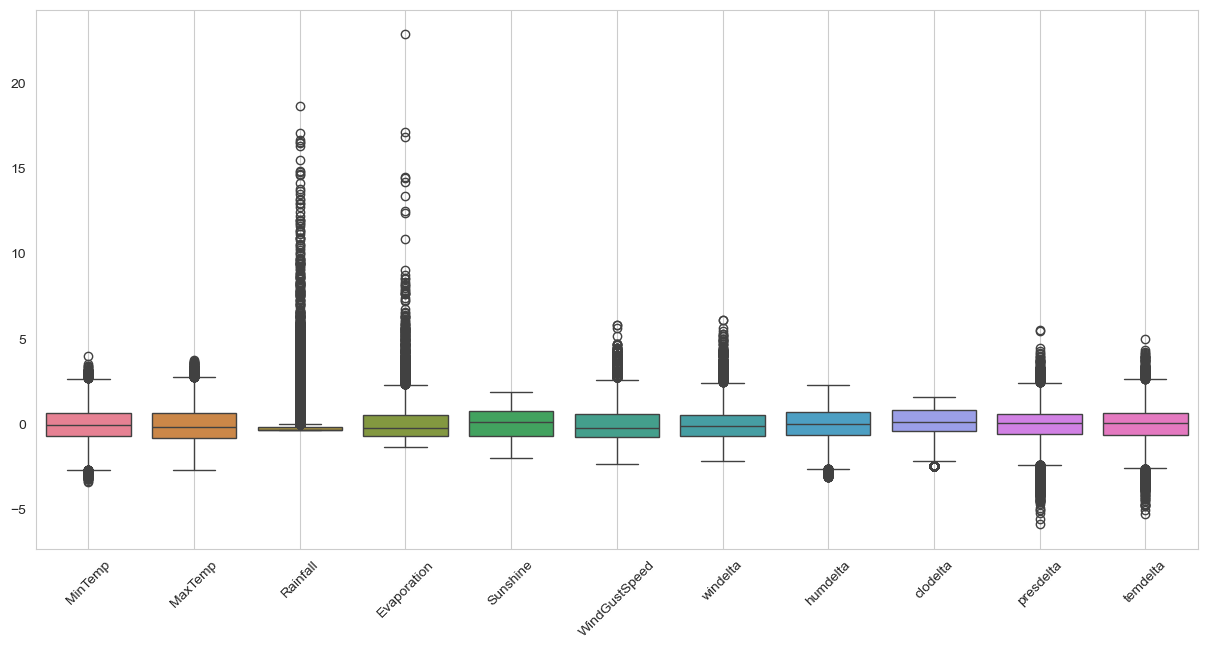

In [189]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(data=dfe[dfn.describe().columns])

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.grid()
plt.show()

In [190]:
dfe

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,RainfallTomorrow,month,windelta,humdelta,clodelta,presdelta,temdelta
6047,Cobar,1.166070,1.998131,-0.314982,2.038138,1.343511,SSW,0.453531,ENE,SW,0.0,0.0,0.0,1,-0.566809,-2.449883,-0.655584,-0.100540,-0.545775
6048,Cobar,1.254261,1.051116,-0.314982,2.825008,1.533296,S,-0.341789,SSE,SSE,0.0,0.0,0.0,1,0.181595,-2.307890,-1.920246,-0.631345,-0.516545
6049,Cobar,0.742757,1.832779,-0.314982,2.206753,1.614633,SE,-0.847901,ENE,N,0.0,0.0,0.0,1,-0.130240,-1.825113,-1.161448,0.285499,-0.706540
6050,Cobar,1.430641,2.358899,-0.314982,1.700907,0.882605,NNE,0.308927,NNE,NNW,0.0,0.0,0.0,1,0.618164,-1.569525,-0.655584,0.478519,-0.370395
6051,Cobar,1.871593,2.479155,-0.314982,1.869522,1.316399,WNW,-0.775599,WNW,WSW,0.0,0.0,0.0,1,-1.439947,-1.711519,-0.908516,0.719794,-0.458085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102515,MountGambier,-0.897582,-0.842914,-0.314982,-1.053141,-0.893241,N,-0.052582,N,NW,0.0,1.0,2.0,6,0.680531,1.128345,0.862011,0.044225,-0.545775
102516,MountGambier,-0.456631,-1.308906,0.003324,-1.053141,-0.893241,S,-1.570919,N,SE,1.0,0.0,0.0,6,-1.502314,1.724716,0.862011,-0.583090,1.178794
102517,MountGambier,-0.756477,-0.933106,-0.314982,-1.053141,-0.893241,N,-0.775599,N,NNW,0.0,0.0,0.0,6,-0.442075,1.128345,0.862011,1.202343,0.009595
102518,MountGambier,-1.038686,-0.857946,-0.314982,-1.053141,-0.893241,N,-0.341789,NNW,W,0.0,1.0,2.2,6,0.805265,1.156744,0.609079,0.237244,-1.042685


In [191]:
categorias = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

# Convertir las columnas especificadas en variables ficticias
dfm = pd.get_dummies(dfe, columns = categorias, dtype = int)

# Mostrar las primeras filas del DataFrame resultante
dfm

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,RainToday,RainTomorrow,RainfallTomorrow,month,windelta,humdelta,clodelta,presdelta,temdelta,Location_Adelaide,Location_Canberra,Location_Cobar,Location_Dartmoor,Location_Melbourne,Location_MelbourneAirport,Location_MountGambier,Location_Sydney,Location_SydneyAirport,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
6047,1.166070,1.998131,-0.314982,2.038138,1.343511,0.453531,0.0,0.0,0.0,1,-0.566809,-2.449883,-0.655584,-0.100540,-0.545775,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6048,1.254261,1.051116,-0.314982,2.825008,1.533296,-0.341789,0.0,0.0,0.0,1,0.181595,-2.307890,-1.920246,-0.631345,-0.516545,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6049,0.742757,1.832779,-0.314982,2.206753,1.614633,-0.847901,0.0,0.0,0.0,1,-0.130240,-1.825113,-1.161448,0.285499,-0.706540,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6050,1.430641,2.358899,-0.314982,1.700907,0.882605,0.308927,0.0,0.0,0.0,1,0.618164,-1.569525,-0.655584,0.478519,-0.370395,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6051,1.871593,2.479155,-0.314982,1.869522,1.316399,-0.775599,0.0,0.0,0.0,1,-1.439947,-1.711519,-0.908516,0.719794,-0.458085,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102515,-0.897582,-0.842914,-0.314982,-1.053141,-0.893241,-0.052582,0.0,1.0,2.0,6,0.680531,1.128345,0.862011,0.044225,-0.545775,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
102516,-0.456631,-1.308906,0.003324,-1.053141,-0.893241,-1.570919,1.0,0.0,0.0,6,-1.502314,1.724716,0.862011,-0.583090,1.178794,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
102517,-0.756477,-0.933106,-0.314982,-1.053141,-0.893241,-0.775599,0.0,0.0,0.0,6,-0.442075,1.128345,0.862011,1.202343,0.009595,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
102518,-1.038686,-0.857946,-0.314982,-1.053141,-0.893241,-0.341789,0.0,1.0,2.2,6,0.805265,1.156744,0.609079,0.237244,-1.042685,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


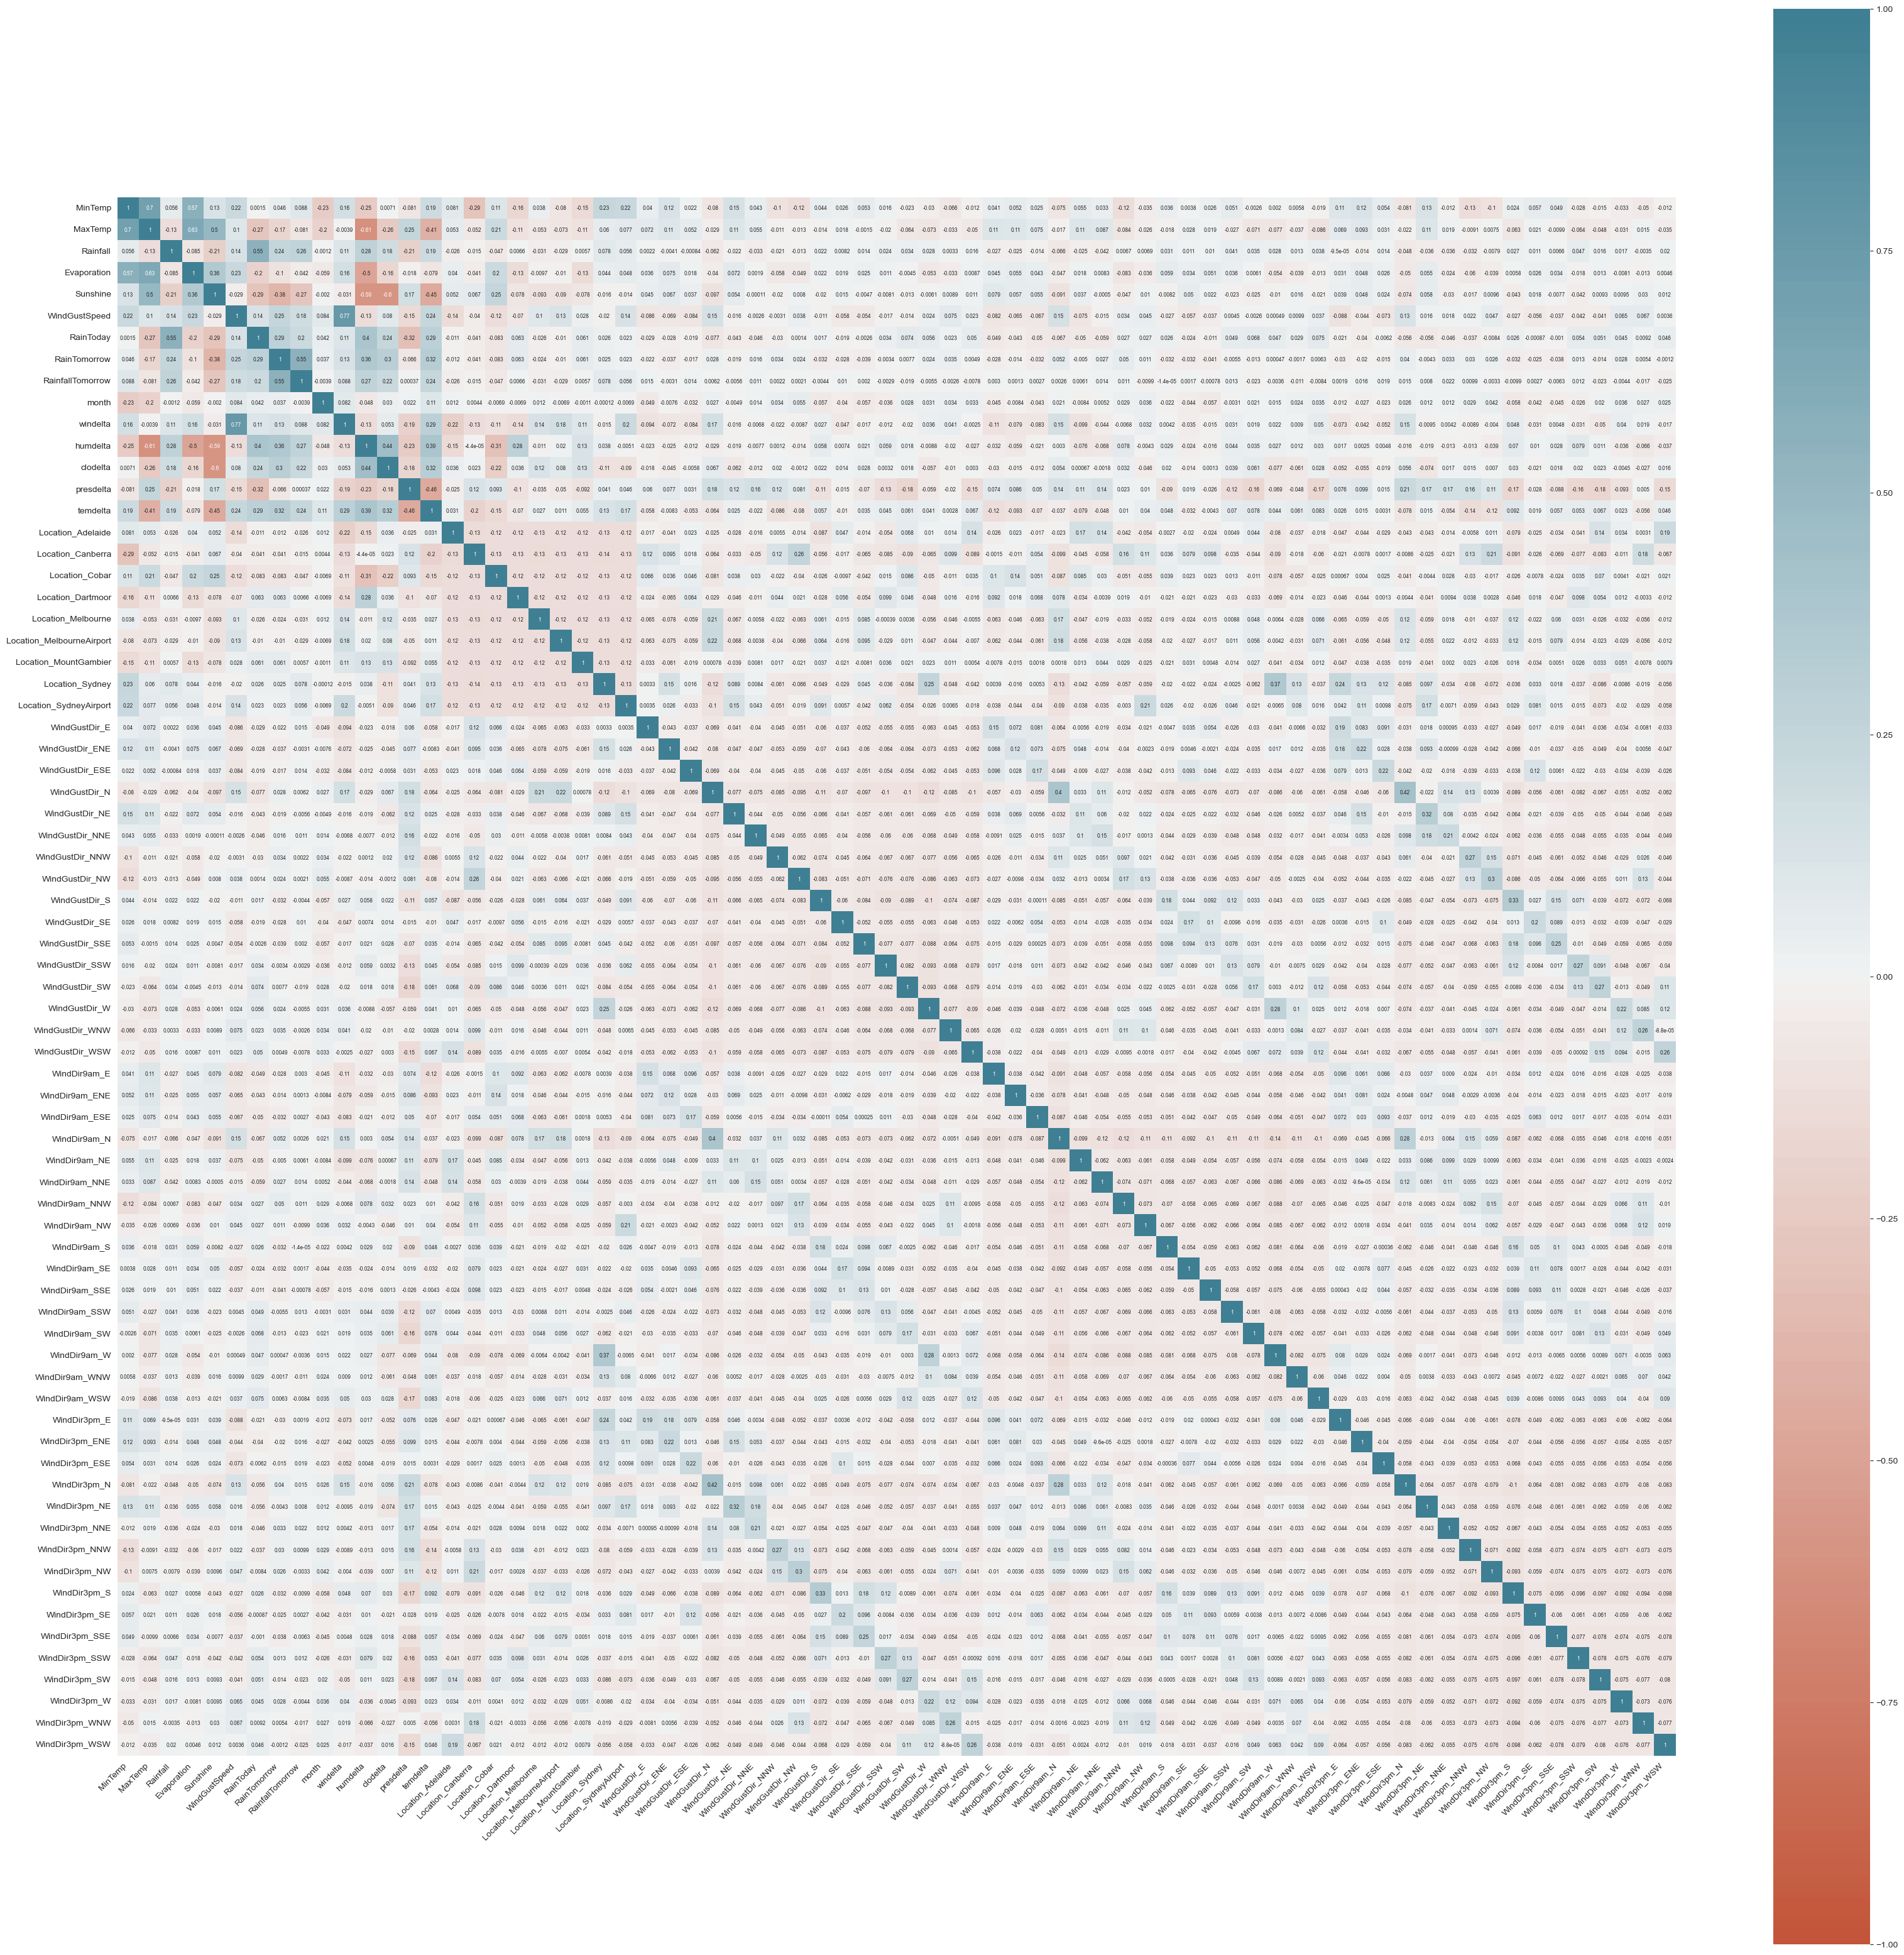

In [192]:
corr = dfm[dfm.describe().columns].corr()
plt.figure(figsize=(40, 40))

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

TRAIN - TEST

In [193]:
x_train, x_test, y_train, y_test = train_test_split(dfm.drop(columns = ['Rainfall', 'RainTomorrow'], axis=1), dfm['Rainfall'], test_size=0.2, random_state=33)

In [194]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((22586, 70), (5647, 70), (22586,), (5647,))

In [195]:
x_train

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,RainToday,RainfallTomorrow,month,windelta,humdelta,clodelta,presdelta,temdelta,Location_Adelaide,Location_Canberra,Location_Cobar,Location_Dartmoor,Location_Melbourne,Location_MelbourneAirport,Location_MountGambier,Location_Sydney,Location_SydneyAirport,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
65450,-1.708932,-1.474258,-0.996936,-1.313480,0.887342,0.0,0.2,8,0.867632,0.617170,1.114944,0.816304,0.184975,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
30342,-0.262612,-1.384066,-0.659705,-1.964172,-1.137108,1.0,16.2,7,-0.192607,1.554325,1.367876,0.188989,0.828034,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
33228,0.389996,0.089069,0.576806,0.313249,0.092022,0.0,0.0,9,0.742898,-1.001553,-0.149719,-0.534835,0.038825,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9025,-0.738839,-0.361891,-0.378680,0.719932,-0.992505,0.0,0.2,5,-0.566809,-0.035999,-0.908516,0.912814,-0.575005,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
101634,0.725119,0.479901,-0.210065,0.231913,-0.197185,0.0,0.0,1,0.243962,0.361582,-0.149719,-1.065639,-0.721155,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101569,-0.086231,-0.437050,-0.041450,0.503035,0.092022,1.0,0.0,11,0.680531,-0.660769,0.862011,-1.162149,0.301895,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6625,-1.320895,-1.489290,-0.659705,0.665707,0.308927,0.0,0.0,8,1.179467,0.418379,-0.655584,0.333754,0.331125,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
33007,1.360089,0.915828,-0.041450,1.424848,-1.281712,0.0,0.0,2,-0.442075,0.077596,-1.667313,-0.438325,0.272665,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8486,1.113156,1.712524,2.487778,1.370623,-0.197185,0.0,0.0,12,0.119228,-1.626323,-0.908516,1.009323,-1.568824,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


REGRESION LINEAL

In [196]:
# Crear y ajustar el modelo de regresión lineal
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [197]:
y_pred = reg.predict(x_test)

In [198]:
reg.coef_, reg.intercept_

(array([-5.71553183e-02,  8.61999283e-02,  1.16432535e-02, -2.48932306e-02,
         5.75871620e-02,  1.16110643e+00,  1.97454971e-02, -6.56474758e-04,
         4.45144180e-02,  1.33905367e-01,  2.69852526e-02, -7.72033258e-02,
        -8.12606452e-02,  2.49825957e+10,  2.49825957e+10,  2.49825957e+10,
         2.49825957e+10,  2.49825957e+10,  2.49825957e+10,  2.49825957e+10,
         2.49825957e+10,  2.49825957e+10,  7.45980547e+09,  7.45980547e+09,
         7.45980547e+09,  7.45980547e+09,  7.45980547e+09,  7.45980547e+09,
         7.45980547e+09,  7.45980547e+09,  7.45980547e+09,  7.45980547e+09,
         7.45980547e+09,  7.45980547e+09,  7.45980547e+09,  7.45980547e+09,
         7.45980547e+09,  7.45980547e+09, -1.70625011e+10, -1.70625011e+10,
        -1.70625011e+10, -1.70625011e+10, -1.70625011e+10, -1.70625011e+10,
        -1.70625011e+10, -1.70625011e+10, -1.70625011e+10, -1.70625011e+10,
        -1.70625011e+10, -1.70625011e+10, -1.70625011e+10, -1.70625011e+10,
        -1.7

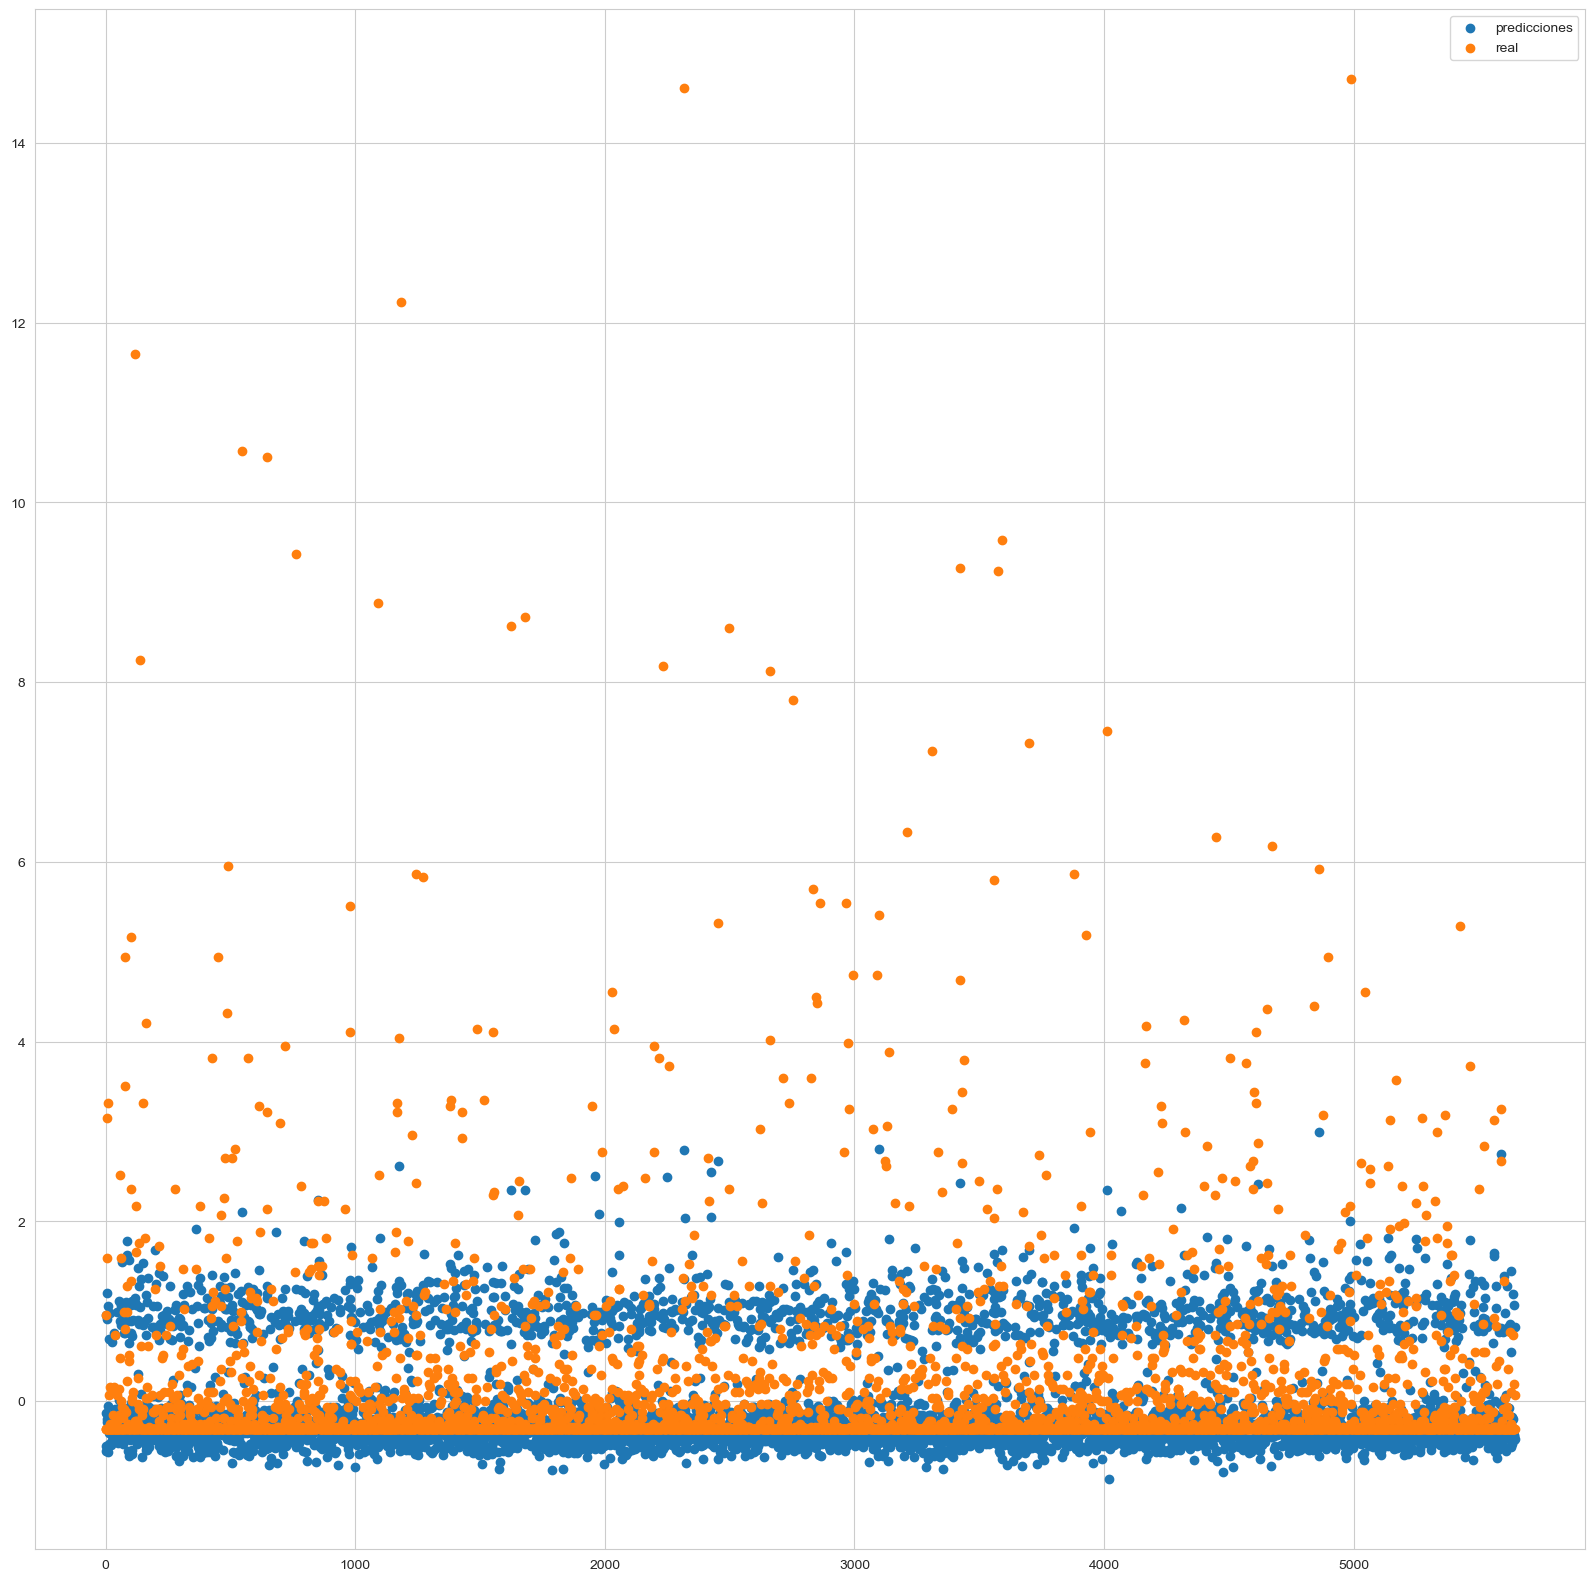

In [203]:
plt.figure(figsize=(20, 20))
x=range(len(y_test))
plt.scatter(x, y=y_pred, label='predicciones')
plt.scatter(x, y=y_test, label='real')
plt.legend()
plt.show()

In [208]:
y_pred.min()

-0.8697624206542969

In [211]:
# Calcular métricas de evaluación

mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse.round(4))

mae=mean_absolute_error(y_test, y_pred)
print("MAE:",mae.round(4))

reg.score(x_train,y_train), reg.score(x_test,y_test)
print(f"""El R² para los datos de entrenamiento es: {reg.score(x_train,y_train).round(4)} y para los de testeo: {reg.score(x_test,y_test)}""")

mape = (mae / (y_test)).mean() * 100
print("MAPE:",mape.round(4))

Error cuadrático medio: 0.566
MAE: 0.328
El R² para los datos de entrenamiento es: 0.3529 y para los de testeo: 0.3629318153583876
MAPE: 2.6042
